<a href="https://colab.research.google.com/github/RYPnini/NinaVideoGame/blob/main/Yiping_Ren_810_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Colab Notebook link:  
https://colab.research.google.com/drive/19sP1XDOI7gbq4JGeIzmJ4GfER2xDEdRU?usp=share_link

# Homework 1 (Total 100 points)

#Homework 1

## Q1. Load and examine the `Auto.csv` dataset from the Blackboard course site. **(20 points total)**

  1. Should you drop any variable from regression analysis and why? (5 points)
  1. Which variables should be treated as numeric and which as categorical? Explain why. (5 points)

FYI column definitions (from https://cran.r-project.org/web/packages/ISLR/ISLR.pdf): 
* mpg: miles per gallon (The outcome, or y, variable)
* cylinders: Number of cylinders between 4 and 8
* displacement: Engine displacement (cu. inches)
* horsepower: Engine horsepower
* weight: Vehicle weight (lbs.)
* acceleration: Time to accelerate from 0 to 60 mph (sec.)
* year: Model year (modulo 100)
* origin: Origin of car (1. American, 2. European, 3. Japanese)
* name: Vehicle name


In [86]:
## Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [87]:
## Connect to google drive
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/Colab Notebooks/BA810/Data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
## Load dataset
auto = pd.read_csv(data_folder+'Auto.csv')
auto.info()
auto.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [89]:
## Count unique classes in each field
def check_class(df):
    nuniquedf = pd.DataFrame({"Variable": df.columns,
                              "Classes": auto.nunique()})
    
    nuniquedf = nuniquedf.reset_index(drop = True)
    nuniquedf = nuniquedf.sort_values('Classes', ascending=False)

    return nuniquedf

check_class(auto)

,Variable,Classes
4,weight,350
8,name,304
0,mpg,129
5,acceleration,95
3,horsepower,94
2,displacement,82
6,year,13
1,cylinders,5
7,origin,3


**Q1.1**

I will drop the `name` variable from the regression analysis.  
As we know, there are 397 rows in the raw dataset and there are 304 different classes in the `name` field. Also, the datatype of the `name` column is object. It should be treated as a categorical variable. However, there are too many detailed classes in `name` which will not benefit our analysis. So, I drop `name` variable from regression analysis.

In [90]:
## Delete name column
del auto['name']

**Q1.2**

After we count the number of unique classes in each field, we find that `year`, `cylinders`, and `origin`, have relatively small number of classes with 13, 5, and 3 classes respectively. Also, the number in each variable don’t have a mathematical meaning. Thus, we will treat these three variables as categorical variables and treat the rest as numeric variables.  
These numeric variables belong to continuous or discrete data which can be used as a form of measurement, and it has mathematical meaning.

In [91]:
## "Year" classes check
print("number of auto classes:", auto.year.unique())

## "Cylinders" classes check
print("number of cylinders classes:", auto.cylinders.unique())

## "Origin" classes check
print("number of origin classes:", auto.origin.unique())

number of auto classes: [70 71 72 73 74 75 76 77 78 79 80 81 82]
number of cylinders classes: [8 4 6 3 5]
number of origin classes: [1 3 2]


- Numeric Variables: `weight`, `mpg`, `acceleration`, `horsepower`, `displacement`

- Categorial variables: `year`, `cylinders`, `origin`

Since we want to treat `horsepower` as numeric variables, but the data type in raw dataset is object. Thus, we will change the datatype to numeric for further analysis. Also, since there are 5 rows with `hoursepower = "?"`, we will delete these five rows for datatype convertion.

In [92]:
## Go though the classes in horsepower
auto['horsepower'].unique()
print("Number of rows for horsepower=""?"" in raw dataset:", 
      len(auto[auto['horsepower'] == "?"]))

Number of rows for horsepower=? in raw dataset: 5


In [93]:
## Since there are 5 rows with horsepower = "?", we want to delete these
auto.drop(auto[auto['horsepower'] == "?"].index, inplace = True)
auto['horsepower'].unique()

## Convert Hoursepower from object to int
auto['horsepower'] = pd.to_numeric(auto['horsepower'])
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6 KB


## Q2. Scatter and explore. **(20 points total)**
1. Plot all the pairwise scatter plots and histograms for the numeric features. (10 points)
1. Discuss two interesting relationships that you notice. (10 points)

**Q2.1**

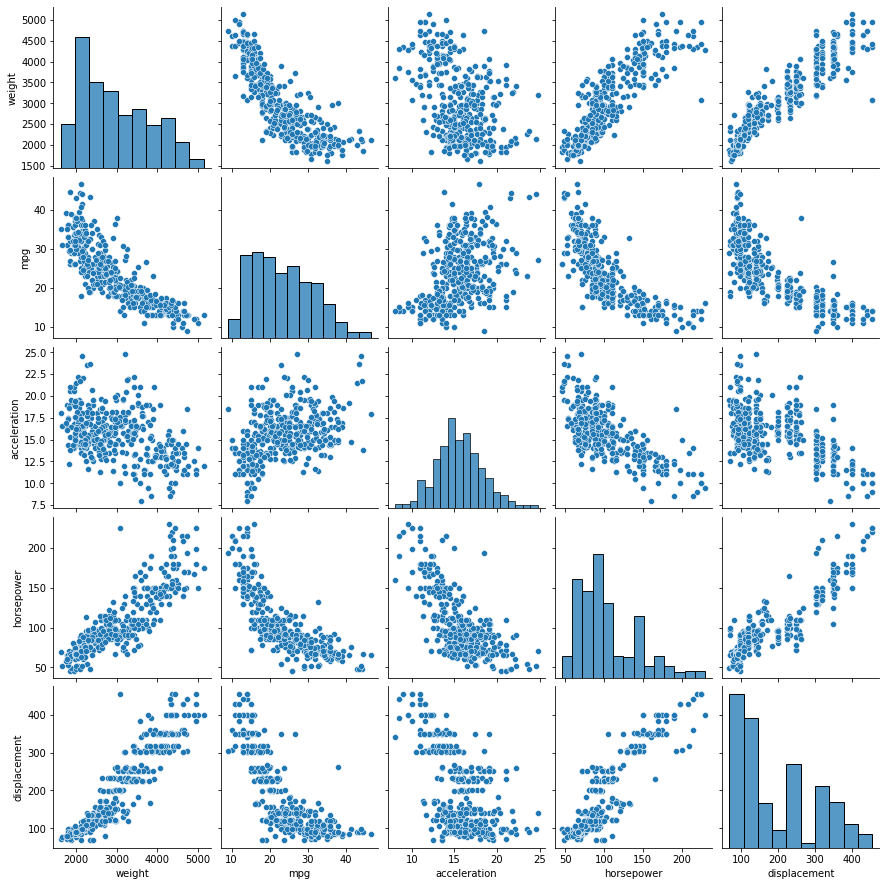

In [94]:
sns.pairplot(auto[["weight", "mpg", "acceleration", 
                   "horsepower", "displacement"]])

**Q2.2**

According to the above scatter plots and histograms, we found that:  
- There are obvious strong relationship between `horsepower` and other numeric features. As the `horsepower` increase, there are increase in `weight` and `displacement`, and there are decrease in `mgp` and `acceleration`. 
- For `mpg`, as `mpg` increases, the `weight`, `horsepower`, and `displacement` decreases. As `mpg` increases, the `acceleration` is more likely to increase but with a weaker relationship comparing to other numeric features.

## Q3. Compute the correlation matrix among the numeric variables. Discuss one interesting correlation. (5+5=**10 points total**)

In [95]:
## Correlation between different variables
autocorr = auto[["weight", "mpg", "acceleration", 
                 "horsepower", "displacement"]].corr()
autocorr

,weight,mpg,acceleration,horsepower,displacement
weight,1.000000,-0.832244,-0.416839,0.864538,0.932994
mpg,-0.832244,1.000000,0.423329,-0.778427,-0.805127
acceleration,-0.416839,0.423329,1.000000,-0.689196,-0.543800
horsepower,0.864538,-0.778427,-0.689196,1.000000,0.897257
displacement,0.932994,-0.805127,-0.543800,0.897257,1.000000


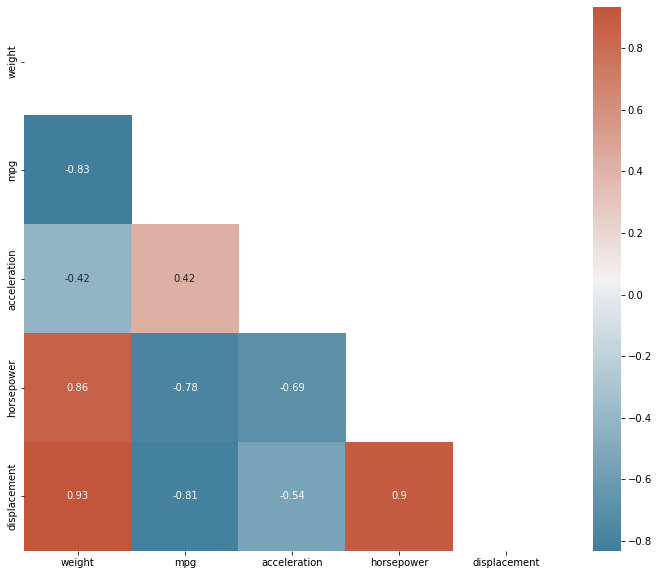

In [96]:
## Heatmap for corr

## Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))

## Generate a mask for upper traingle
mask = np.triu(np.ones_like(autocorr, dtype=bool))

## Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

## Draw the heatmap
sns.heatmap(autocorr, annot=True, mask = mask, cmap=cmap)

In the above table, we can find the correlation among all numeric variables.   

The closer corr is to zero, the weaker the linear relationship. 

Positive corr values indicate a positive correlation, where the values of both variables tend to increase together. 
Similarly, negative corr values indicate a negative correlation, where the values of one variable tend to increase when the values of the other variable decrease.

- There is a strong positive linear relationship between `displacement` and `weight` with correlation coefficient = 0.932994. As `displacement` increases, `weight` tends to increase

## Q4. Use `statsmodels` to regress mpg on all other variables. Note you can tell `ols()` to treat a variable as categorical by enclosing the variable in `C()`. (10 points) **(15 points total)**
  1. Interpret the significant effects. (5 points)
  1. Which variables don't have a significant effect? Provide potential explanation for one surprising non-effect. (5 points)
  1. Discuss the difference in results when you treat `year` as a categorical vs a numeric variable. (5 points)

**Q4.1**

In [97]:
automodel = smf.ols('mpg ~ weight + acceleration + horsepower + displacement + \
                     C(year) + C(cylinders) + C(origin)', auto).fit()
print(automodel.summary().tables[1])

                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.9168      2.361     13.095      0.000      26.274      35.559
C(year)[T.71]         0.9104      0.816      1.116      0.265      -0.693       2.514
C(year)[T.72]        -0.4903      0.804     -0.610      0.542      -2.071       1.090
C(year)[T.73]        -0.5529      0.721     -0.766      0.444      -1.972       0.866
C(year)[T.74]         1.2420      0.855      1.453      0.147      -0.439       2.923
C(year)[T.75]         0.8704      0.837      1.039      0.299      -0.776       2.517
C(year)[T.76]         1.4967      0.802      1.866      0.063      -0.080       3.074
C(year)[T.77]         2.9987      0.820      3.657      0.000       1.386       4.611
C(year)[T.78]         2.9738      0.779      3.816      0.000       1.442       4.506
C(year)[T.79]         4.8962      0.825      5.936    

Significant effect can be interpreted by p-value. As p-value is smaller than 0.05 (assume α = 0.05), we can say that the result is statistically significant.  
From the above table, for the variables with `P>|t|` < 0.05, we can say that this item is significant.  
- For categorical variables:  
 - Some of the model `year` is insignificant for `year = 71 - 76` with p-value > 0.05, and some model `year` is significant for `year from 77 to 82` whose p-value <= 0.05. It seems like, for the model `year` is higher, it tends to be significant to `mpg`.  
 - For `cylinders` and `origin` classes, the p-values are all smaller than 0.05, which means that they are all significant in the model.
- For numeric variables:
 - `Weight` and `horsepower` have significant effect which are smaller than 0.05.
 - However, the p-value of `acceleration` and `displacement` are larger than 0.05. We can say that they are insignificant. 

**Q4.2**

**Variables with insignificant effect:**

`Acceleration`, `displacement`, and some `year` like `year = 71-76` do not have a significant effect, whose p-value is smaller than 0.05.  


**`Displacement` has a surprising non-effect:**  
For multiple regression, the p-value for `displacement` is 0.082 which is bigger than 0.05, which means `displacement` is insignificant to `mpg`. However, from the correlation matrix, we know that the correlation between `displacement` and `mpg` is -0.805127, where exists strong negative relationship. We found that the relationship in the multiple regression and the relationship in the simple linear regression implies the opposite. 


**Here's the potential explanation:**

Notice that the correlation between `displacement` and `weight` is 0.932994. This indicates that auto with high `displacement` tends to also have high `weight`. Now suppose that the multiple regression is correct and `displacement` is not associated with `mpg`, but `weight` is associated with `mpg`. Then, we that if we have a larger `weight`, the `mpg` will tend to be higher, and as our correlation matrix shows, we also tend to have higher `displacement`. Hence, in a simple linear regression which only examines `mpg` versus
`displacement`, we will observe that higher values of `displacement` tend to be associated with higher values of `mpg`, even though `displacement` is not directly associated with `mpg`. So `displacement` is a surrogate for `weight`; `displacement` gets “credit” for the association between
`weight` on `mpg`.

*(reference to An Introduction to Statistical Learning Book P74)*

**Q4.3**

In [98]:
## Treat Year as numeric variable 
automodel_2 = smf.ols('mpg ~ weight + acceleration + horsepower + displacement \
                            + year + C(cylinders) + C(origin)', auto).fit()
print(automodel_2.summary().tables[1])

                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -22.0801      4.541     -4.862      0.000     -31.009     -13.151
C(cylinders)[T.4]     6.7218      1.654      4.064      0.000       3.470       9.974
C(cylinders)[T.5]     7.0784      2.516      2.813      0.005       2.131      12.026
C(cylinders)[T.6]     3.3512      1.824      1.837      0.067      -0.236       6.938
C(cylinders)[T.8]     5.0992      2.109      2.418      0.016       0.953       9.246
C(origin)[T.2]        1.7640      0.551      3.200      0.001       0.680       2.848
C(origin)[T.3]        2.6172      0.527      4.964      0.000       1.581       3.654
weight               -0.0058      0.001     -9.154      0.000      -0.007      -0.005
acceleration          0.0260      0.093      0.279      0.780      -0.157       0.209
horsepower           -0.0349      0.013     -2.639    

After we change `year` from categorical variable to numeric variable, there are something changed. Treated as numeric variable:  
- There are some variables and classes' significance are changed.  
Such as: `displacement` with p-value = 0.01 < 0.05 is now significant to `mpg`; `Acceleration` is now insignificant to `mpg`.  
- In the summary table, the beta is condensed into one beta for numeric `year` rather than several betas for different classes of categorical `year`.  
- The interpretation of beta for `year` changes. 
 - For numeric `year`, beta = 0.7370 represents the expected change of `mpg` if `year` increase one unit, holding all other explanatory variables constant.  
 - For categorical `year`, beta for `year=71` = 0.9104 represents the estimate difference in the expected `mpg` for `year=71` relative to `year=70` (baseline).


## Q5. From the above regression model in Q4, include two way interactions between a numeric and categorical variable in three different regression models (three separate models in total). Do any of them appear significant? Discuss the results. **(15 points total)**


In [99]:
## model1
model_with_interaction1 = smf.ols("mpg ~ horsepower + C(cylinders) + \
                                         horsepower*C(cylinders)", auto).fit()
print(model_with_interaction1.summary().tables[1])

                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.5161     27.244      0.056      0.956     -52.050      55.083
C(cylinders)[T.4]               45.8468     27.287      1.680      0.094      -7.805      99.498
C(cylinders)[T.5]               58.5217     29.991      1.951      0.052      -0.447     117.491
C(cylinders)[T.6]               18.1007     27.421      0.660      0.510     -35.815      72.016
C(cylinders)[T.8]               22.6749     27.333      0.830      0.407     -31.066      76.416
horsepower                       0.1918      0.274      0.700      0.484      -0.347       0.730
horsepower:C(cylinders)[T.4]    -0.4227      0.274     -1.540      0.124      -0.962       0.117
horsepower:C(cylinders)[T.5]    -0.5886      0.312     -1.886      0.060      -1.202       0.025
horsepower:C(cylinders)[T.6]  

For model1, we found that the p-value for all variables are greater than 0.05. None of these variables, classes, or interactions are significant in this model. 



In [100]:
## model2
model_with_interaction2 = smf.ols('mpg ~ displacement + C(origin) + \
                                         displacement*C(origin)', auto).fit()
print(model_with_interaction2.summary().tables[1])

                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      33.5576      0.777     43.181      0.000      32.030      35.086
C(origin)[T.2]                  9.7999      2.812      3.485      0.001       4.271      15.328
C(origin)[T.3]                  6.7869      2.437      2.785      0.006       1.995      11.578
displacement                   -0.0546      0.003    -18.721      0.000      -0.060      -0.049
displacement:C(origin)[T.2]    -0.0891      0.024     -3.662      0.000      -0.137      -0.041
displacement:C(origin)[T.3]    -0.0417      0.022     -1.883      0.060      -0.085       0.002


For model2, we found that:  

There are no significance for interaction `displacement:C(origin)[T.3]` with p-value = 0.060 > 0.05. But `displacement` and `C(origin)[T.3]` seperately are significance to `mpg`.  
There are significance for interaction `displacement:C(origin)[T.2]`. 

`Origin` and `displacement` are significant to `mpg`.

In [101]:
## model3
model_with_interaction3 = smf.ols('mpg ~ horsepower + displacement + C(origin) \
                                         + horsepower*C(origin)', auto).fit()
print(model_with_interaction3.summary().tables[1])

                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    33.6169      0.827     40.640      0.000      31.991      35.243
C(origin)[T.2]               14.4741      2.247      6.441      0.000      10.056      18.892
C(origin)[T.3]               16.5276      2.286      7.230      0.000      12.033      21.022
horsepower                   -0.0119      0.015     -0.808      0.419      -0.041       0.017
horsepower:C(origin)[T.2]    -0.1755      0.027     -6.482      0.000      -0.229      -0.122
horsepower:C(origin)[T.3]    -0.1716      0.028     -6.183      0.000      -0.226      -0.117
displacement                 -0.0492      0.006     -8.341      0.000      -0.061      -0.038


For model3, we found that `horsepower` is unsignificant to `mpg`, but the interaction between `horsepower` and `origin` classes is significant. `Origin` classes and `displacement` are significance to `mpg`.

## Q6. Measure the in-sample and out of sample $R^2$ of the model estimated in Q4.1 using 20% data for testing. **(10 points total)**

In [102]:
D_train, D_test = train_test_split(auto, test_size = .20, random_state=0)
print('in-sample r-square: {:.2f}'.format(automodel.rsquared))
predictions = automodel.predict(D_test) 
# automatically transforms the test data per the formula
print('out-of-sample r-square: {:.2f}'.format(r2_score(D_test.mpg, predictions)))

in-sample r-square: 0.87
out-of-sample r-square: 0.89


## Q7. Collaboration statement **(10 points total)**
Who did you discuss while answering this homework (whether to get or to provide help)? What questions/topics did you discuss? 

Note: No penalty for either side. While getting help in figuring out how to solve is OK, all answers should be produced by you. 

I discussed with Tao Li for this homework. We are not sure about whether the column name should be dropped or not and the column year should be treated as numeric variable or categorical variable.

In [103]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

from google.colab import drive
drive.mount('/content/drive')

!cp /content/drive/My\ Drive/Colab\ Notebooks/Yiping_Ren_810_HW1.ipynb ./

!jupyter nbconvert --to PDF "Yiping_Ren_810_HW1.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
texlive is already the newest version (2017.20180305-1).
texlive-latex-extra is already the newest version (2017.20180305-2).
texlive-xetex is already the newest version (2017.20180305-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook Yiping_Ren_810_HW1.ipynb to PDF
[NbConvertApp] Writing 52758 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet'